# Test de hipotesis: t-test

## Teoria:

Los problemas de pruebas de hipótesis se resuelven diseñando un estadístico de prueba adecuado para la distribución en cuestión: el número que podemos utilizar realmente para estimar la probabilidad de equivocarnos.

Supongamos que medimos la media de una distribución a partir de un montón de puntos de datos que tenemos.  
Planteamos una **hipótesis contraria**: que ``esta distribución no tiene mas o menos esa media``. Esto se conoce como **hipótesis nula, o H0**.  
La **hipótesis alternativa, Ha** , es que ``esta distribución sí tiene más o menos esa media``.  
A continuación, seleccionamos un nivel de significación: cuánto riesgo estamos dispuestos a correr de equivocarnos. Supongamos que elegimos α=0,05 (hay un 5% de posibilidades de que nos equivoquemos). Aplicamos algún tipo de test estadístico a los datos y obtenemos un valor p para nuestra estimación media.  
El nivel de significación nos indica la improbabilidad (en una escala probabilística [0,1]) de nuestro resultado. en una escala probabilística.
Supongamos que tenemos un nivel de significación de 0,01.  
Como 0,01<0,05 el nivel de significación es menor que el umbral que elegimos de antemano,  
por lo que ``rechazamos la hipótesis nula y aceptamos Ha`` : este resultado es tan raro que estamos lo suficientemente seguros de que la media que elegimos es errónea.

Todo este procedimiento se conoce como "prueba de hipótesis".

Esta prueba es adecuada para estimaciones sobre variables independientes idénticamente distribuidas, siempre que (aproximadamente) n>30 .

Las variables deben ser "independientes" porque una variable no puede influir en ninguna de las demás variables de la distribución. Un ejemplo de lo contrario -una variable dependiente- sería una serie temporal de cotizaciones bursátiles. Si el precio de las acciones de MSFT es de 100$ hoy, es improbable que sea de 200$ mañana, y si es de 200$ mañana, es improbable que sea de 50$ pasado mañana. Una variable independiente es aquella que no hace esto. Por ejemplo, el número que se saca de los bombos en lotería.

Las variables deben estar "idénticamente distribuidas" porque la prueba requiere que la distribución de la que se extraen los números no "varíe" con el tiempo.

Las variables que cumplen estas dos condiciones se denominan variables i.i.d. La mayoría de los estimadores son i.i.d. por definición.

La condición n>30  es interesante. Esta condición se deriva de lo que se conoce como el Teorema del Límite Central: dadas suficientes extracciones, la media normalizada de una secuencia de variables I.I.D. convergerá casi con seguridad a la distribución normal N(μ=0,σ2=1)

## t-test: firearm dataset

dataset y practica obtenida de: https://www.kaggle.com/code/residentmario/hypothesis-testing-with-firearm-licensees/notebook 

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv (r'data\federal-firearm-licensees.csv', index_col=0)[1:]#Elimina la primera fila porque son guiones

C:\Users\User\AppData\Local\Temp\ipykernel_16432\1939266183.py:1: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (r'data\federal-firearm-licensees.csv', index_col=0)[1:]


In [5]:
df.head()

,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
1,1,66,003,01,7L,00150,"SALAZAR-MORET, CHARLES",AGUADA SPORT SHOP & ARMORY,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
2,1,66,003,01,8F,00258,"HERNANDEZ-MUNOZ, GILBERTO",ARMERIA Y ACCESORIOS EL NARANJAL,CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA,AGUADA,PR,00602,4 REPTO MINERVA,AGUADA,PR,00602,7878680125
3,1,66,003,08,8H,00285,"SALAZAR MORET, CHARLES",AGUADA SPORT SHOP,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
4,1,66,005,01,9M,00224,"CARDONA-VALENTIN, VIRGINIA",SHOOTING ACCESSORIES & SERVICE,BO PALMAR CARR 111 KM 1.8,AGUADILLA,PR,00603,HC 2 BOX 20554,AGUADILLA,PR,00603,7876587174
5,1,66,013,01,8M,83577,"GUTIERREZ-MARTINEZ, ORLANDO",G G AND GUNS,BETANCES 165,ARECIBO,PR,00612,BETANCES 165,ARECIBO,PR,00612,7878788329


### Número medio de titulares de licencias de venta de armas por condado:

Supongamos que estamos interesados en medir el número medio de titulares de licencias de venta de armas por condado. Si miramos estos datos, esto es lo que encontramos:

*Se utiliza para aplicar el estilo de visualización "FiveThirtyEight" a los gráficos en Matplotlib. FiveThirtyEight es un sitio web de noticias y análisis que es conocido por su estilo distintivo de visualización de datos.*

<Axes: ylabel='Frequency'>

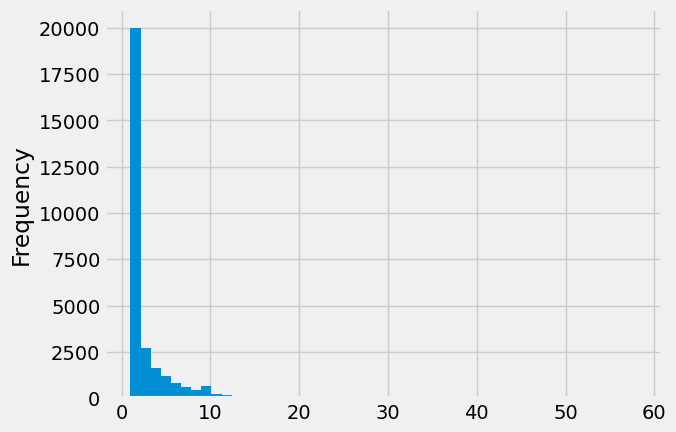

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
df['Premise Zip Code'].value_counts().plot.hist(bins=50)

(tenga en cuenta que, como excluyo los condados que no tienen ninguna tienda de armas de fuego, se trata en realidad de una métrica errónea, pero es suficiente a efectos de demostración).

In [19]:
df['Premise Zip Code'].value_counts().tail()

Premise Zip Code
21222        1
56435        1
564350000    1
56441        1
506010000    1
Name: count, dtype: int64

calculamos la media:

In [9]:
df['Premise Zip Code'].value_counts().mean()

2.7566777819794424

#### Planteamiento de hipótesis

H0: n¯=2.75  
Ha: n¯≠2.75
Fijemos nuestro nivel p en 0,05. Es decir, digamos que estamos dispuestos a aceptar un riesgo del 5% de que al rechazar la hipótesis nula estemos equivocados.

In [10]:
X = df['Premise Zip Code'].value_counts()

Calculamos a mano t:

In [11]:
import numpy as np
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [12]:
t, p

(0.36027134698029034, 0.7186442244499154)

In [13]:
import scipy.stats as stats

stats.ttest_1samp(a=X, popmean=2.75)

TtestResult(statistic=0.36026515435690487, pvalue=0.718651470754852, df=29088)

#### Conclusion

La puntuación t  nos dice que nuestro resultado está a 0,36 desviaciones típicas del resultado medio del estimador medio que podemos esperar. Sin embargo, ¡0,36 desviaciones típicas no es mucho! Nuestro valor p  nos dice que casi el 72% de los posibles valores de estimación media están más lejos de nuestra expectativa que el valor que obtuvimos.

En otras palabras, un valor medio de 2,75 está en el percentil 72 de cercanía.

``Dado que 0,72>0,05 no rechazamos la hipótesis nula H0 . Concluimos que hay pruebas sólidas de que n¯=2,75 -es decir, ¡que el número medio de armerías por código postal en EE.UU. es casi 3!``

Como referencia, aquí está la forma habitual de realizar esta prueba utilizando scipy:

La comprobación de hipótesis se utiliza mucho en la literatura porque es una herramienta relativamente sencilla y potente para tomar decisiones. Las pruebas de hipótesis nos permiten establecer qué nivel de confianza queremos tener en alguna observación sobre nuestros datos y, a continuación, al probar esa observación, determinar si estamos satisfechos o no de que sea correcta.

Otra forma de tomar esta decisión es plasmarla en un gráfico. Por ejemplo, podríamos haber recalculado aleatoriamente la media de un número creciente de valores del conjunto de datos, y utilizarla para determinar el grado de confianza que tenemos en nuestro resultado.  
  
Así, por ejemplo, tomaremos la media de una sola muestra del conjunto de datos; después, la media de dos muestras del conjunto de datos; después, la de tres, y así sucesivamente. Así es como se vería:

<Axes: >

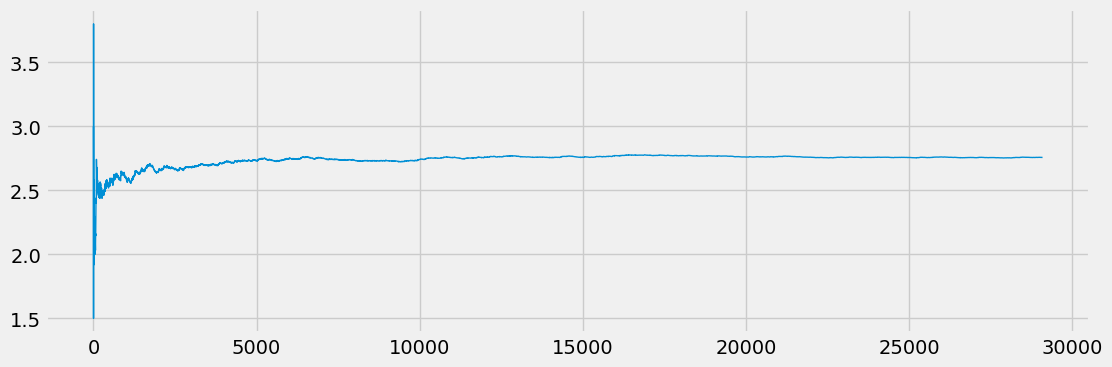

In [14]:
r = (df['Premise Zip Code']
         .value_counts()
         .sample(len(df['Premise Zip Code'].unique()) - 1))
pd.Series(r.cumsum() / np.array(range(1, len(r) + 1))).reset_index(drop=True).plot.line(
    figsize=(12, 4), linewidth=1
)

``Como puede ver, la media de nuestros valores se estabiliza en el valor "verdadero" a lo largo del tiempo. Independientemente de la cantidad de varianza al principio de la distribución, al final tenemos una idea muy aproximada de que el resultado real es aproximadamente 2,75.``

El código genera un gráfico de línea que muestra cómo se acumula el porcentaje de frecuencia de los valores únicos en la columna 'Premise Zip Code' de un conjunto de datos.

Aquí está el proceso paso a paso:

Primero, se calcula la frecuencia de cada valor único en la columna 'Premise Zip Code' utilizando value_counts(). Luego, se toma una muestra aleatoria de esas frecuencias, excepto la de mayor frecuencia. Esto se hace para evitar que el valor más común domine el gráfico y permitir que los valores menos comunes sean más visibles.

A continuación, se calcula la acumulación porcentual dividiendo la suma acumulada de las frecuencias por el número de observaciones hasta ese punto. Esto se hace para ver cómo se acumula el porcentaje de frecuencia a medida que avanzamos a través de los valores únicos.

Finalmente, se traza el gráfico de línea utilizando la serie calculada anteriormente. El eje x representa el número de observaciones y el eje y muestra el porcentaje acumulado de frecuencia.

En resumen, el gráfico muestra cómo se acumula el porcentaje de frecuencia de los valores únicos en la columna 'Premise Zip Code'. Esto permite visualizar cómo contribuyen los valores menos comunes a medida que aumenta el número de observaciones. La exclusión del valor más común ayuda a resaltar la distribución de los valores menos frecuentes.